# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on Ridge and Lasso regression!

## Objectives

You will be able to:

- Use Lasso and ridge regression in Python
- Compare Lasso and Ridge with standard regression

## Housing Prices Data

Let's look at yet another house pricing data set.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at df.info

In [2]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We'll make a first selection of the data by removing some of the data with `dtype = object`, this way our first model only contains **continuous features**

Make sure to remove the SalesPrice column from the predictors (which you store in `X`), then replace missing inputs by the median per feature.

Store the target in `y`.

In [39]:
# Load necessary packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# remove "object"-type features and SalesPrice from `X`
columns=[]
for c in df.columns:
    if df[c].dtype==np.float64 or df[c].dtype==np.int64 and c!='SalePrice':
        columns.append(c)
X=df[columns]
for c in X:
    median=X[c].median()
    X[c].fillna(value=median,inplace=True)
y=df.SalePrice

# Create y


Look at the information of `X` again

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

## Let's use this data to perform a first naive linear regression model

Compute the R squared and the MSE for both train and test set.

In [41]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y)
# Fit the model and print R2 and MSE for train and test
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print('Training r^2:', lin_reg.score(X_train, y_train))
print('Testing r^2:', lin_reg.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg.predict(X_test)))

Training r^2: 0.8218882992879786
Testing r^2: 0.7766220243948558
Training MSE: 1126283082.7207007
Testing MSE: 1395592446.2515547


## Normalize your data

We haven't normalized our data, let's create a new model that uses `preprocessing.scale` to scale our predictors!

In [42]:
from sklearn import preprocessing

# Scale the data and perform train test split
X_normed=preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_normed,y)

Perform the same linear regression on this data and print out R-squared and MSE.

In [43]:
# Your code here
lin_reg_norm=LinearRegression()
lin_reg_norm.fit(X_train,y_train)
print('Training r^2:', lin_reg_norm.score(X_train, y_train))
print('Testing r^2:', lin_reg_norm.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg_norm.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg_norm.predict(X_test)))

Training r^2: 0.8257718967344632
Testing r^2: 0.7258969617571193
Training MSE: 1218616638.7376711
Testing MSE: 1116953812.6709418


## Include dummy variables

We haven't included dummy variables so far: let's use our "object" variables again and create dummies

In [44]:
# Create X_cat which contains only the categorical variables
cat_columns =[]
for c in df.columns:
    if df[c].dtype==np.object:
        cat_columns.append(c)
X_cat = df[cat_columns]

np.shape(X_cat)

(1460, 43)

In [46]:
# Make dummies
X_cat = pd.get_dummies(X_cat)

Merge `x_cat` together with our scaled `X` so you have one big predictor dataframe.

In [48]:
# Your code here
X_all=pd.concat([pd.DataFrame(X_normed),X_cat],axis=1)

Perform the same linear regression on this data and print out R-squared and MSE.

In [49]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X_all, y)
lin_reg_norm_cat=LinearRegression()
lin_reg_norm_cat.fit(X_train,y_train)
print('Training r^2:', lin_reg_norm_cat.score(X_train, y_train))
print('Testing r^2:', lin_reg_norm_cat.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg_norm_cat.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg_norm_cat.predict(X_test)))

Training r^2: 0.9268003917803893
Testing r^2: -3.1663727428945544e+21
Training MSE: 464063914.77260274
Testing MSE: 1.965037997726549e+31


Notice the severe overfitting above; our training R squared is quite high, but the testing R squared is negative! Our predictions are far far off. Similarly, the scale of the Testing MSE is orders of magnitude higher then that of the training.

## Perform Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables) and perform Lasso and Ridge regression for both! Each time, look at R-squared and MSE.

## Lasso

With default parameter (alpha = 1)

In [50]:
# Your code here
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
print('Training r^2:', lasso.score(X_train, y_train))
print('Testing r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(X_test)))

Training r^2: 0.9377473959740608
Testing r^2: 0.8647186221880261
Training MSE: 394663138.6659047
Testing MSE: 839550707.9255538


With a higher regularization parameter (alpha = 10)

In [51]:
# Your code here
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
print('Training r^2:', lasso.score(X_train, y_train))
print('Testing r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(X_test)))

Training r^2: 0.9363955179425574
Testing r^2: 0.874478468349884
Training MSE: 403233646.4439286
Testing MSE: 778981501.084529


## Ridge

With default parameter (alpha = 1)

In [52]:
# Your code here
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print('Training r^2:', ridge.score(X_train, y_train))
print('Testing r^2:', ridge.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ridge.predict(X_test)))

Training r^2: 0.9244918052226483
Testing r^2: 0.8714103508568525
Training MSE: 478699672.2805193
Testing MSE: 798022112.9923514


With default parameter (alpha = 10)

In [53]:
# Your code here
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
print('Training r^2:', ridge.score(X_train, y_train))
print('Testing r^2:', ridge.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ridge.predict(X_test)))

Training r^2: 0.8991428766555286
Testing r^2: 0.8779256072352022
Training MSE: 639404398.8803681
Testing MSE: 757588697.8894799


## Look at the metrics, what are your main conclusions?

Conclusions here

Ridge and Lasso are both much more useful and predictive than the standard Linear regression.  In all 4 of the Ridge and Lasso trials, the r^2 and MSE were close and in the same order of magnitude, suggesting that they are at a happy medium of not over or under fitting while still achieving a high r^2 and thus high usefulness

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

149


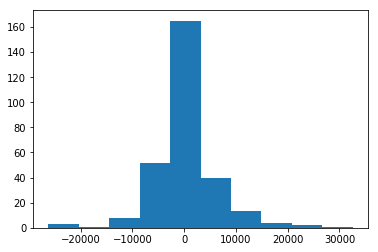

In [68]:
# number of Ridge params almost zero
coef=list(ridge.coef_)
plt.hist(coef)
print(sum(abs(ridge.coef_<.000000000001)))

171


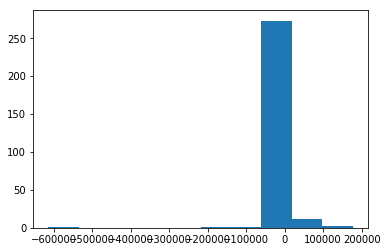

In [67]:
# number of Lasso params almost zero
lascoef=list(lasso.coef_)
plt.hist(lascoef)
print(sum(abs(lasso.coef_<.000000000001)))

Compare with the total length of the parameter space and draw conclusions!

In [69]:
# your code here
# They both have zeroed out many coefficients but the Lasso has done it to more features

## Summary

Great! You now know how to perform Lasso and Ridge regression.